In [11]:
import cv2
import torch
import random
import numpy as np
from src.io.io import read_rgb
from src.transform.transform import transform
from src.dataset.road_dataset import RoadDataset
from src.model.segmentation_module import RoadSegmentationModule

In [12]:
def visualize(image: np.array, mask: np.array, category: list, ):
    """plots images in one row
    """
    
    plt.figure(figsize=(32, 9))
    plt.subplot(1, 3, 1)
    plt.title(f"Original Image")
    plt.imshow(image)
    
    plt.subplot(1, 3, 2)
    plt.title(f"Mask for {category}")
    # mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    plt.imshow(mask)
    # masked_img = np.where(mask[...,None], color, img)
    color = np.array([20, 250, 10], dtype=np.uint8)
    masked_img = np.where(mask[..., None], color, image)
    image = cv2.addWeighted(image, 0.5, masked_img, 0.5, 0)
    
    plt.title(f"Image with masks")
    plt.imshow(image)
    plt.show()

In [13]:
model = RoadSegmentationModule.load_from_checkpoint(
    "/Users/riccardomusmeci/Downloads/epoch=8-step=1007-val_loss=0.059-val_iou=0.943.ckpt"
)
model.model.eval();

In [14]:
dataset = RoadDataset(
    data_dir="/Users/riccardomusmeci/progetti/github/dataset/road-segmentation/Dataset",
    classes=["lane"],
    train=False,
    transform=transform(train=False, input_size=224)
)

index = random.randint(0, len(dataset)-1)
img_path = dataset.images[index]
x, mask = dataset[index]

In [15]:
preds = model(x.unsqueeze(0))
preds = torch.sigmoid(preds)

In [16]:
pred_mask = preds.squeeze().squeeze().detach().numpy()

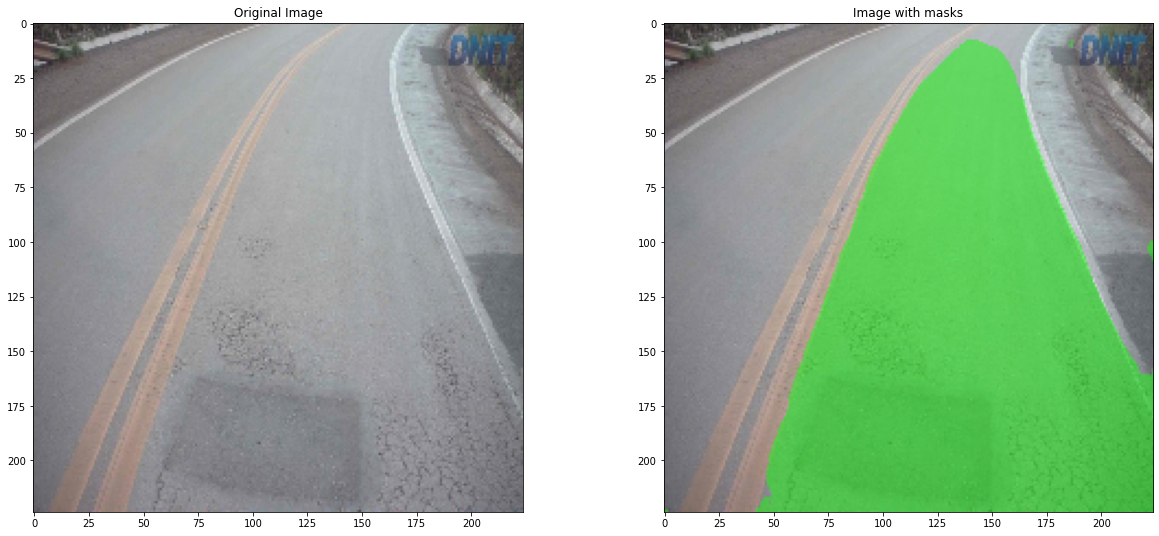

In [17]:
pred_mask[pred_mask>0.5] = 1
pred_mask[pred_mask<=0.5] = 0

image = read_rgb(file_path=img_path + "_RAW.jpg")
image = cv2.resize(image, (224, 224))

visualize(
    image=image,
    mask=pred_mask,
    category="lane"
)